In [ ]:
# ..... try integration with scib tools ..... #
# building with info from   https://scib.readthedocs.io/en/latest/api.html

In [1]:
import scanorama
import scanpy 
import pandas as pd
import numpy as np
import scib

In [76]:
adata1 = scanpy.read_h5ad("stage9_sample1_hvg.h5ad")
adata2 = scanpy.read_h5ad("stage9_sample2_hvg.h5ad")
adata3 = scanpy.read_h5ad("stage9_sample3_hvg.h5ad")

# List of datasets:
adatas = [ adata1, adata2, adata3 ]

/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/orig.ident' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_RNA' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nFeature_RNA' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/log10GenesPerUMI' was written without encoding metadata.
  return read_elem(dataset)
/home/suresh/miniconda3/lib/pyth

In [77]:
alldata = scanpy.concat(adatas)
alldata

AnnData object with n_obs × n_vars = 32722 × 2816
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'log10GenesPerUMI', 'stage', 'sample', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet', 'dataset', 'Qiu_class', 'KS_class'
    obsm: 'X_pca', 'X_umap'

In [78]:
# hvg_df = scanpy.pp.highly_variable_genes(alldata, n_top_genes=2000, inplace=False)
# hvg_list = scib.preprocessing.hvg_batch(alldata, batch_key='sample', target_genes=2000)
alldata.obs['sample'] = alldata.obs['sample'].astype('category')

In [79]:
alldata_corrected = scib.ig.scanorama(alldata, batch="sample")

Found 2816 genes among all datasets
[[0.         0.57888805 0.66895793]
 [0.         0.         0.70576634]
 [0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (0, 2)
Processing datasets (0, 1)


/home/suresh/miniconda3/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])
/home/suresh/miniconda3/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(datasets[i])
/home/suresh/miniconda3/lib/python3.9/site-packages/scanorama/scanorama.py:237: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, 

In [80]:
scanpy.pp.neighbors(alldata_corrected, use_rep="X_scanorama")
scanpy.tl.umap(alldata_corrected)
scanpy.tl.leiden(
    alldata_corrected, key_added="clusters", n_iterations=2
)

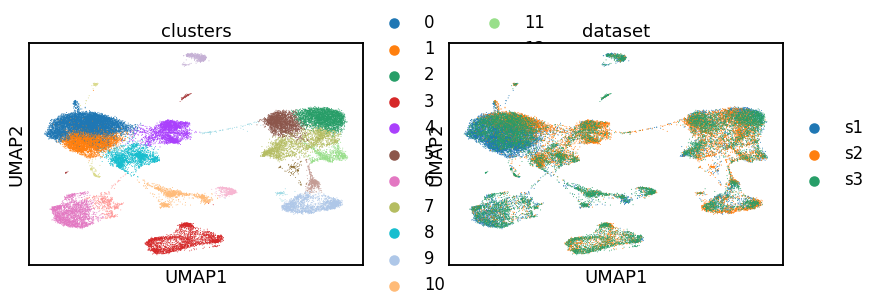

In [81]:
scanpy.pl.umap(
    alldata_corrected, color=["clusters", "dataset"], palette=scanpy.pl.palettes.default_20
)

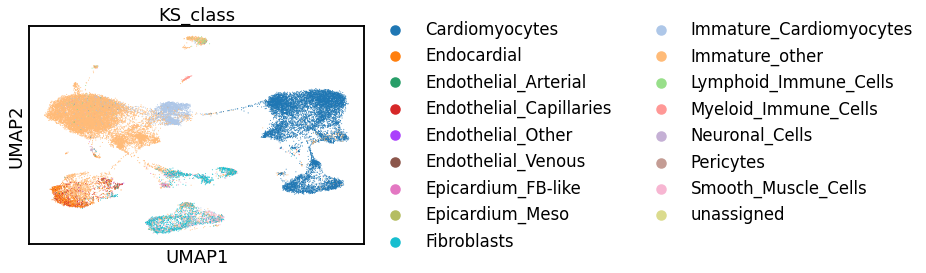

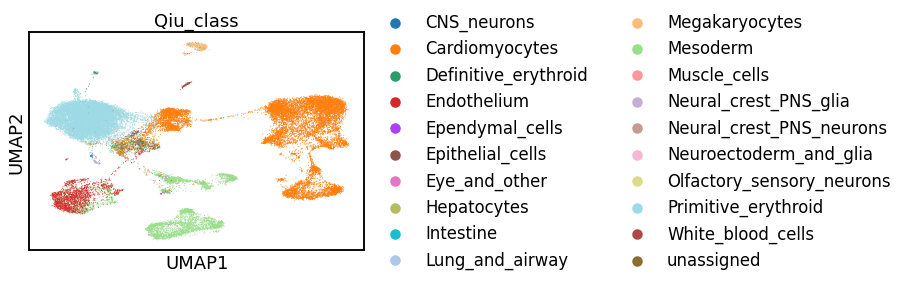

In [86]:
scanpy.pl.umap(
    alldata_corrected, color="KS_class", palette=scanpy.pl.palettes.default_20
)
scanpy.pl.umap(
    alldata_corrected, color="Qiu_class", palette=scanpy.pl.palettes.default_20
)

In [83]:
# get dataframe of main metrics
df1 = scib.metrics.metrics(alldata, alldata_corrected, batch_key='sample', label_key='Qiu_class', 
                      embed='X_scanorama', cluster_key='clusters', ari_=True, nmi_=True, silhouette_=True,
                    graph_conn_=True, kBET_=True)

df2 = scib.metrics.metrics(alldata, alldata_corrected, batch_key='sample', label_key='KS_class', 
                      embed='X_scanorama', cluster_key='clusters', ari_=True, nmi_=True, silhouette_=True,
                    graph_conn_=True, kBET_=True)

/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
Graph connectivity...
kBET...
Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Intestine consists of a single batch or is too small. Skip.
Lung_and_airway consists of a single batch or is too small. Skip.
Eye_and_other consists of a single batch or is too small. Skip.


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
Graph connectivity...
kBET...
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9
Adding diffusion to step 10


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9
Adding diffusion to step 10
Adding diffusion to step 11
Adding diffusion to step 12
Adding diffusion to step 13


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


Adding diffusion to step 4


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndat

Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6


/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/suresh/miniconda3/lib/python3.9/site-packages/scib/metrics/kbet.py:229: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [84]:
# save metrics from scib
df1.to_csv('stage9_scanorama_hvg_matrics_Qiu.csv')
df2.to_csv('stage9_scanorama_hvg_matrics_KS.csv')

In [85]:
# save anndata object
alldata_corrected.write_h5ad('stage9_scanorama_hvg.h5ad')

# save embeddings and clusters from Scanorama
np.savetxt('stage9_scanorama_pca_hvg.csv', alldata_corrected.obsm['X_scanorama'], delimiter=",")
np.savetxt('stage9_scanorama_umap_hvg.csv', alldata_corrected.obsm['X_umap'], delimiter=",")
pd.DataFrame(alldata_corrected.obs['clusters']).to_csv('stage9_scanorama_clusters_hvg.csv')

In [ ]:
# plots

In [102]:
alldata_corrected = scanpy.read_h5ad("stage16_scanorama_hvg.h5ad")

In [103]:
# raw
scanpy.pp.neighbors(alldata_corrected, use_rep="X_pca")
scanpy.tl.umap(alldata_corrected)
scanpy.tl.leiden(
    alldata_corrected, key_added="before_clusters", n_iterations=2
)

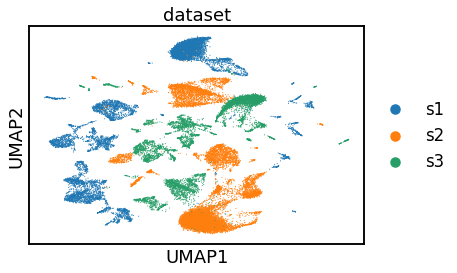

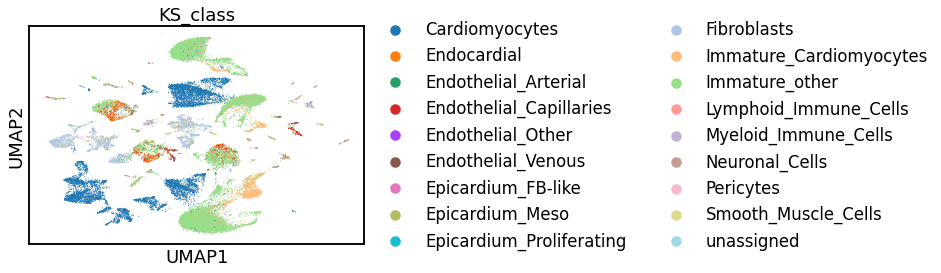

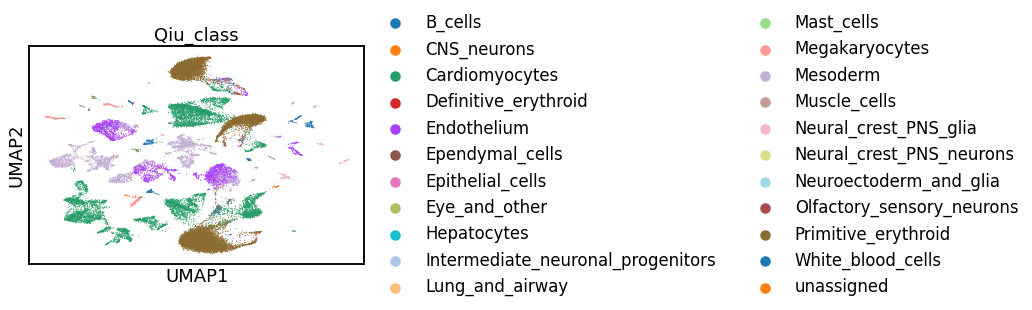

In [104]:
scanpy.pl.umap(alldata_corrected, color="dataset", palette=scanpy.pl.palettes.default_20, 
               save='stage16_before_batch.png')
scanpy.pl.umap(alldata_corrected, color="KS_class", palette=scanpy.pl.palettes.default_20,
               save='stage16_before_KS.png')
scanpy.pl.umap(alldata_corrected, color="Qiu_class", palette=scanpy.pl.palettes.default_20,
               save='stage16_before_Qiu.png')

In [105]:
# corrected
scanpy.pp.neighbors(alldata_corrected, use_rep="X_scanorama")
scanpy.tl.umap(alldata_corrected)
scanpy.tl.leiden(
    alldata_corrected, key_added="after_clusters", n_iterations=2
)

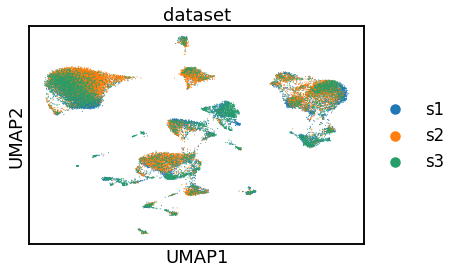

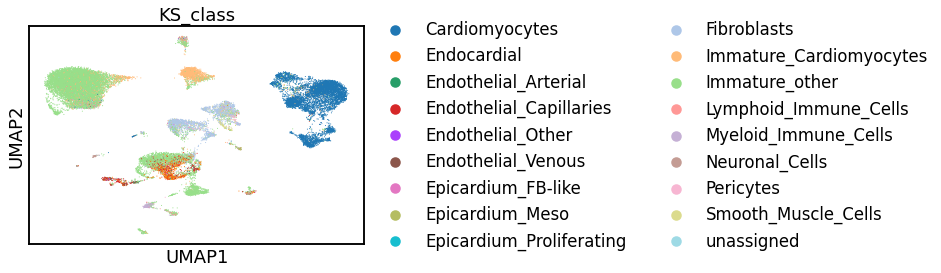

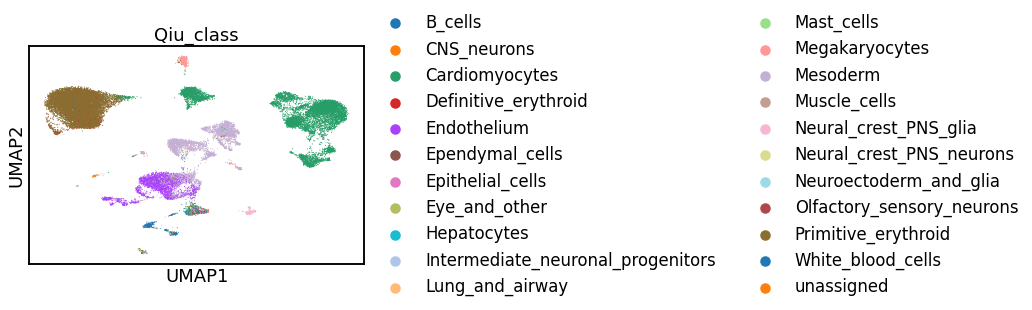

In [106]:
scanpy.pl.umap(alldata_corrected, color="dataset", palette=scanpy.pl.palettes.default_20, 
               save='stage16_after_batch.png')
scanpy.pl.umap(alldata_corrected, color="KS_class", palette=scanpy.pl.palettes.default_20,
               save='stage16_after_KS.png')
scanpy.pl.umap(alldata_corrected, color="Qiu_class", palette=scanpy.pl.palettes.default_20,
               save='stage16_after_Qiu.png')